In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Simulate two stock prices

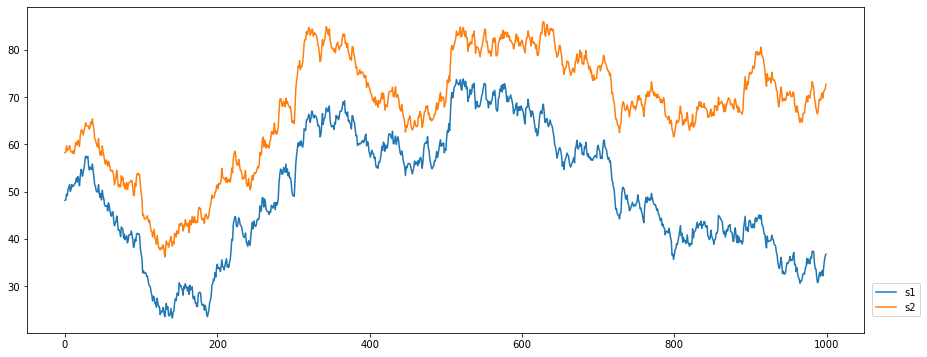

In [4]:
# just set the seed for the random number generator
np.random.seed(100)
# use returns to create a price series
drift = 100
r0 = pd.Series(np.random.normal(0, 1, 1000))

s0 = pd.Series(np.cumsum(r0), name='s0') + drift

noise1 = np.random.normal(0, 0.4, 1000)
drift1 = 50
r1 = r0 + noise1
s1 = pd.Series(np.cumsum(r1), name='s1') + drift1

noise2 = np.random.normal(0, 0.4, 1000)
drift2 = 60
r2 = r0 + noise2
s2 = pd.Series(np.cumsum(r2), name='s2') + drift2

pd.concat([s1, s2], axis=1).plot(figsize=(15,6))
plt.legend(loc=(1.01, .05))
plt.show()

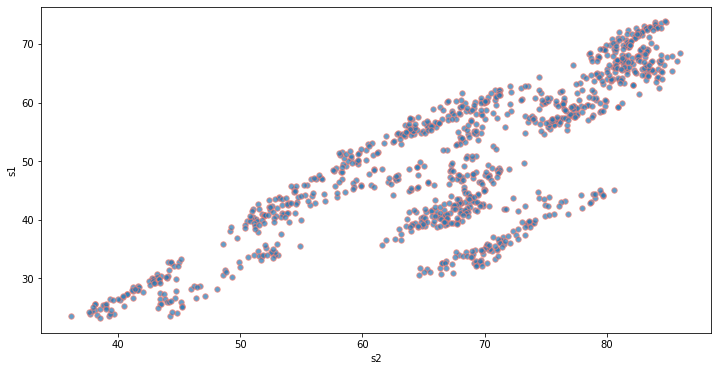

In [8]:
## Plot data with scatterplot
plt.figure(figsize=(12, 6))
sc = plt.scatter(s2, s1, s=30, edgecolor='salmon', alpha=0.7)
plt.xlabel('s2')
plt.ylabel('s1');

In [9]:
from sklearn.linear_model import LinearRegression

# Quiz: Linear Regression
Note that the `LinearRegression().fit()` expects 2D numpy arrays. Since s1 and s2 are pandas series, we can use `Series.values` to get the values as a numpy array. Since these are 1D arrays, we can use `numpy.reshape(-1,1)` to make these 1000 row by 1 column 2 dimensional arrays.

The coefficients of the linear regression, $\beta$ and intercept for the regression line:

$y=\beta x + intercept$

Can be obtained after fitting to the data. Use `LinearRegression.coef_` for the slope (beta coefficients) and `LinearRegression.intercept_` for the intercept. You may want to practice accessing these outside of the function definition, to see if you'll need additional brackets [] to access the values

In [14]:
def regression_slope_and_intercept(xSeries, ySeries):
    """
    xSeries: pandas series, x variable
    ySeries: pandas series, y variable
    """
    lr = LinearRegression()


    #TODO: call LinearRegression.fit().  Pass in the x variable then y variable
    lr.fit(xSeries.values.reshape(-1, 1), ySeries.values.reshape(-1, 1));

    #TODO: obtain the slope and intercept
    slope = lr.coef_[0][0]
    intercept = lr.intercept_[0]

    return (slope, intercept)

slope, intercept = regression_slope_and_intercept(s1, s2);
print(f"slope {slope:.2f} and intercept {intercept:.2f}")

slope 0.74 and intercept 30.62


Text(0, 0.5, 's1')

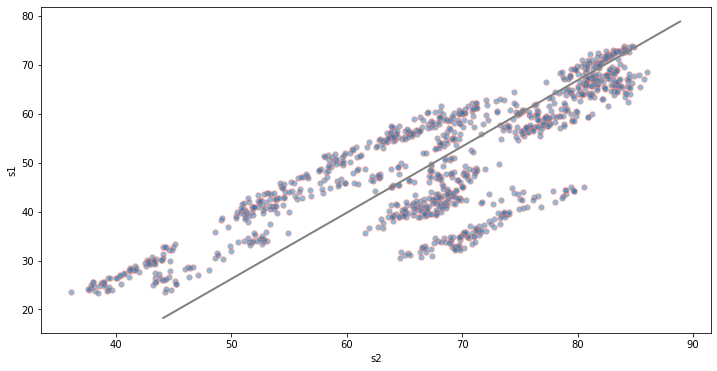

In [21]:
## Plot data with scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(s2, s1, s=30, edgecolor='salmon', alpha=0.5);
x = np.linspace(s1.min()-5, s1.max()+5, 2)
yPred = slope * x + intercept
plt.plot(yPred, x, lw=2, color='grey', )
plt.xlabel('s2')
plt.ylabel('s1')